# Ladesäulen KFW rc

Von  Jannis Breitenstein <br>


Diese Notebook ist in folgende Abschnitte unterteilt:
z67u.[]
+ [1. Import Bibliotheken](#1)<br>
+ [2. Laden und Aufbereiten der Zapfsäulendaten](#2)<br>
+ [2.1 Laden und Aufbereitung der Daten](#2.1)<br>
+ [2.2 Exportieren und Einlesen der Daten](#2.1)<br>
+ [3. Explorative Datenanalyse](#3)<br>
+ [3.1 Allgeime Daten über die Datensets](#3.1)<br>
+ [3.2 Veröffentlichung der Filme](#3.2)<br>
+ [3.3 Verteilung der Filmbewertungen](#3.3)<br>
+ [3.4 Wann sind die Filme bewertet worden](#3.4)<br>
+ [3.5 Verteilung von Filmbewertungen und Benutzern](#3.5)<br>
+ [4. Filtern der Daten](#4)<br>
+ [5. Anweden des KNN-Modells](#5)<br>
+ [5.1 Vorbereitung des KNN-Modells](#5.1)<br>
+ [5.2 Berechnung von allen Nachbarn und Export](#5.2)<br>
+ [5.3 Vorbereitung für Precision and Recall](#5.3)<br>
+ [5.4 Presicion and Recall](#5.4)<br>
+ [5.5 Empfehlung mit Hilfe des Fuzzy Algorithmus](#5.5)<br>
***

In [ ]:
##  cd C:\Python\KFW_V1
##  !{sys.executable} -m pipenv shell
## dsad
"""
pip3 install virtualenv
cd C:\Python\KFW_V1\kfw> 
python -m venv kfw  --> Zum Erstellen, wenn bereits vorhanden dann Active
.\kfw\Scripts\activate
--> When Activation is failing: Set-ExecutionPolicy -Scope CurrentUser -ExecutionPolicy Unrestricted --> Repeat step four
--> to run the Jupyter Notebook in virtual Enviroment it is recommended to install all jupyter dependencies --> !{sys.executable} -m pip3 install jupyter

pip freeze > requirements.txt

"""


# <a id=1>1. Import Bibliotheken </a>


In [ ]:
"""

import sys
!{sys.executable} --version
print(sys.executable)
!{sys.executable} -m pip install autokeras
!{sys.executable} -m pip install altair
!{sys.executable} -m pip install bayesian-optimization
!{sys.executable} -m pip install chart_studio
!{sys.executable} -m pip install cx_Oracle
!{sys.executable} -m pip install dython
!{sys.executable} -m pip install fastparquet
!{sys.executable} -m pip install fuzzywuzzy
!{sys.executable} -m pip install geopandas
!{sys.executable} -m pip install graphviz
!{sys.executable} -m pip install glom
!{sys.executable} -m pip install ipywidgets
!{sys.executable} -m pip install ipython-sql
# Wichtig
!{sys.executable} -m pip install keras
!{sys.executable} -m pip install lime
!{sys.executable} -m pip install nltk
# Wichtig
!{sys.executable} -m pip install numpy
# Wichtig
!{sys.executable} -m pip install notebook 
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install openpyxl
# Wichtig
!{sys.executable} -m pip install pandas
#
!{sys.executable} -m pip install pillow
!{sys.executable} -m pip install plotly
!{sys.executable} -m pip install pyarrow
!{sys.executable} -m pip install python-Levenshtein
!{sys.executable} -m pip install prettytable
!{sys.executable} -m pip install pyspark
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install surprise
!{sys.executable} -m pip install scikit-surprise 
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install spaCy
!{sys.executable} -m pip install sqlalchemy
!{sys.executable} -m pip install talos
!{sys.executable} -m pip install tensorflow
!{sys.executable} -m pip install torch
!{sys.executable} -m pip install wrangle
!{sys.executable} -m pip install requests

"""

In [1]:
#Import Bibliothen
# Zum Speichern der Daten
import pandas as pd

# Wird zur Erstellung mehrdimensionalen Arrays benötigt
import numpy as np

# interaktive Diagramme erstellen
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# Lineare Regression 
from sklearn.linear_model import LinearRegression

# Datetime
import datetime

import matplotlib.pyplot as plt

import seaborn as sns

import geopandas as gpd

***
# <a id=2>2. Laden und Aufbereiten der Daten </a>

***

## 2.1 Datenaufbereitung </a>
***

In [2]:
# Define actual Datapath
path = "C:/Python/KFW_V1/Ladesaeulenregister.csv"

df_raw= pd.read_csv(path,
                encoding = "ISO-8859-1",
                delimiter= ';',
                decimal= ',',
                skiprows = 10,
                engine = 'python')


del  path

In [3]:
df = df_raw

## Daten in Float Formatieren

df = df[df['Breitengrad'].str.contains('52,19168124567324.') == False]
df['Breitengrad'] = df['Breitengrad'].astype(float)

#df['Breitengrad'] = df['Breitengrad'].replace('.',',')


df['P4 [kW]'] = df['P4 [kW]'].str.replace(',','.') 
df['P4 [kW]'] = df['P4 [kW]'].replace(',','.') 
df['P4 [kW]'] = df['P4 [kW]'].str.replace('','') 
df['P4 [kW]'] = df['P4 [kW]'].str.replace(' ','') 
df['P4 [kW]'] = df['P4 [kW]'].replace('','0')

df['P4 [kW]'] = df['P4 [kW]'].astype(float)

df['P4 [kW]'] = df['P4 [kW]'].replace('.',',')

df['Inbetriebnahmedatum'] = pd.to_datetime(df.Inbetriebnahmedatum, dayfirst= True)

Convert_df= {'Betreiber': 'object',
                 'Straße': 'object', 
                 'Hausnummer': 'object',
                 'Adresszusatz' : 'object',
                 'Ort' : 'object',
                 'Bundesland' : 'object',
                 'Kreis/kreisfreie Stadt' : 'object',
                 'Breitengrad' : 'float',
                 'Längengrad' : 'float',
                 'Inbetriebnahmedatum' : 'datetime64',
                 'Anschlussleistung' : 'float',
                 'Normalladeeinrichtung' : 'object',
                 'Anzahl Ladepunkte' : 'int64',
                 'Steckertypen1' : 'object',
                 'P1 [kW]' : 'float',
                 'Public Key1' : 'object',
                 'Steckertypen2' : 'object',
                 'P2 [kW]' : 'float',
                 'Public Key2' : 'object',
                 'Steckertypen3' : 'object',
                 'P3 [kW]' : 'float',
                 'Public Key3' : 'object',
                 'Steckertypen4' : 'object',
                 'P4 [kW]' : 'float',
                 'Public Key4' : 'object'
                  }

df = df.astype(Convert_df)

print(df.info())




C:\Users\jsbreite\AppData\Local\Temp\ipykernel_9768\223194332.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jsbreite\AppData\Local\Temp\ipykernel_9768\223194332.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jsbreite\AppData\Local\Temp\ipykernel_9768\223194332.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34721 entries, 0 to 34721
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Betreiber               34721 non-null  object        
 1   Straße                  34721 non-null  object        
 2   Hausnummer              34721 non-null  object        
 3   Adresszusatz            4847 non-null   object        
 4   Postleitzahl            34721 non-null  int64         
 5   Ort                     34721 non-null  object        
 6   Bundesland              34721 non-null  object        
 7   Kreis/kreisfreie Stadt  34721 non-null  object        
 8   Breitengrad             34721 non-null  float64       
 9   Längengrad              34721 non-null  float64       
 10  Inbetriebnahmedatum     34721 non-null  datetime64[ns]
 11  Anschlussleistung       34721 non-null  float64       
 12  Normalladeeinrichtung   34721 non-null  object

***
## 2.2 Allgemeine Informationen zum Datenset </a>
***

In [ ]:
# df = df_raw
# Ausgabe Datentypen
#What are the datatypes in each column?
print(df.info())

# Let's see what attributes columns we have.
print(df.columns)

# There are quite some columns. How many, actually?
# How many columns do you have?
print(len(df.columns))




In [ ]:
# Wie viele Datensätze haben wir sprich Spalten
print(len(df.index))

# Was ist die Dimension vom Datenset
#What is the dimension of the dataset? Note: Your answer should be a tuple value.
print(df.shape)

## Wie viele Werte haben die einzelen Spalten
print(df.count())

## Anzeigen der aktuellen Datenstruktur
#display(df)


In [ ]:
## Löschen von doppelten Spalten
df_f = df

# Drop all rows with NaN.
df_f = df_f.dropna(axis = 0, how = 'all', inplace = False)
#df_f = df_f.fillna("", inplace=False)

#df_null_values = df_f.isnull().sum()


print('Vor dem entfernen hatte der Datensatz {} Zeilen. Nach dem entfernen {}  Insgesamt wurden  entfernt'.format(len(df.index), len(df_f.index) ))

del df_f

In [ ]:
##  Ausgabe der Duplikate
dupli = df.duplicated(keep=False).sum()
print('In dem Datensatz Ladensauelenregister liegen {} Duplikate vor'.format(dupli))

duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF = duplicateRowsDF.sort_values(by=['Breitengrad'])
display(duplicateRowsDF)


del duplicateRowsDF , dupli

In [ ]:
## Exportieren der Dateien in eine CSV

path_csv = "C:/Python/KFW_V1/Ladesaeulenregister_Bearbeitet.csv"
df.to_csv(path_csv,
            sep = ';',
            header = True,
            index= True,
            decimal= ','
            
            )

In [ ]:
# Exportieren der Daten in ein Parquet
parquet_df= 'C:/Python/KFW_V1/Ladesaeulenregister_Bearbeitet.zip'
df.to_parquet(parquet_df, index = True)



***
# <a id=3>3. Explorative Datenanalyse </a>

***



## 3.1. Importieren der Daten </a>

In [ ]:
parquet_df= 'C:/Python/KFW_V1/Ladesaeulenregister_Bearbeitet.zip'
df = pd.read_parquet(parquet_df)

Convert_df= {'Betreiber': 'object', 
                 'Straße': 'object', 
                 'Hausnummer': 'object',
                 'Adresszusatz' : 'object',
                 'Ort' : 'object',
                 'Bundesland' : 'object',
                 'Kreis/kreisfreie Stadt' : 'object',
                 'Breitengrad' : 'float',
                 'Längengrad' : 'float',
                 'Inbetriebnahmedatum' : 'datetime64',
                 'Anschlussleistung' : 'float',
                 'Normalladeeinrichtung' : 'object',
                 'Anzahl Ladepunkte' : 'int64',
                 'Steckertypen1' : 'object',
                 'P1 [kW]' : 'float',
                 'Public Key1' : 'object',
                 'Steckertypen2' : 'object',
                 'P2 [kW]' : 'float',
                 'Public Key2' : 'object',
                 'Steckertypen3' : 'object',
                 'P3 [kW]' : 'float',
                 'Public Key3' : 'object',
                 'Steckertypen4' : 'object',
                 'P4 [kW]' : 'float',
                 'Public Key4' : 'object'
                  }

df = df.astype(Convert_df)


## 3.2. Allgeime Daten über die Datensets </a>

In [ ]:
# Show missing values in a figure --> Get first Idea how Much Data is missing

plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='Greys')
plt.xticks(rotation=45, fontsize=6)
plt.tight_layout()
#plt.savefig('C:/Python/KFW_V1/Ladesaeulenregister_Duplis.pdf')
plt.plot()
#plt.close()


In [ ]:
print('# Anzahl der Betreiber bei Gruppe \n ')
df_Betreiber_cnt_tmp = df.groupby(['Betreiber'])['Betreiber'].count().sort_values(ascending=False)
print(df_Betreiber_cnt_tmp.head(10))
print('\n')

print( '# Anzahl der Normalladeeinrichtung \n')
df_n_cnt = df.groupby(['Normalladeeinrichtung'])['Normalladeeinrichtung'].count().sort_values(ascending=False)
print(df_n_cnt.head(10))
print('\n')



In [ ]:
print('# Gruppierung nach Anschlussleistung \n') 
df_An_cnt = df.groupby(['Anschlussleistung'])['Anschlussleistung'].count().sort_values(ascending=False)
print(df_An_cnt.head(10))
print('\n')


In [ ]:
print('# Gruppierung nach Bundesland \n') 
df_B_cnt = df.groupby(['Bundesland'])['Bundesland'].count().sort_values(ascending=False)
print(df_B_cnt.head(10))
print('\n')

print('# Gruppierung nach Max Leistung \n') 
df_kw_cnt = df.groupby(['P1 [kW]'])['P1 [kW]'].count().sort_values(ascending=False)
print(df_kw_cnt.head(10))
print('\n')


In [ ]:
print('# Anzahl der maximalen Ladepunkten innerhalb von Deutschland \n') 
df_lpm_cnt = df['Anzahl Ladepunkte']
df_lpm_cnt = df_lpm_cnt.max()
print(df_lpm_cnt)
print('\n')

# Durchschnittswert
print('# Ermittlung der Durchschnittswerte \n') 
list_columns = ['Anschlussleistung',
                'Anzahl Ladepunkte', 'P1 [kW]', 'P2 [kW]', 'P3 [kW]', 'P4 [kW]']
df1 = df[list_columns]
print(df1.mean(axis=0, skipna = True))



# del df_Betreiber_cnt_tmp ,df_n_cnt ,df_An_cnt ,df_B_cnt ,df_kw_cnt , df_lp_cnt, df_lpm_cnt , df1

In [ ]:
print('# Anzahl von Ladepunkten innerhalb von Deutschland \n') 
df_lp_cnt = df['Anzahl Ladepunkte']
df_lp_cnt = df_lp_cnt.sum(axis = 0, skipna = True)
print(df_lp_cnt)
print('\n')

In [ ]:
# Daten einholen
#data = df['Inbetriebnahmedatum'].value_counts().sort_index()
data = pd.to_datetime(df['Inbetriebnahmedatum'], format='%d.%m.%Y').value_counts().sort_index()
#df['Inbetriebnahmedatum'] = pd.to_datetime(df['Inbetriebnahmedatum'], format='%d.%m.%Y')

# Linie erstellen
trace = go.Scatter(x = data.index,
                   y = data.values,
                   marker = dict(color = '#db0000'))
# Layout erstellen
layout = dict(title = '{} Ladesäulen sortiert nach Inbetriebnahme'.format(df.shape[0]),
              xaxis = dict(title = 'Inbetriebnahmejahr'),
              yaxis = dict(title = 'Säule'))

# Plot erstellen
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)


del layout, trace, fig, data

In [ ]:
# Darstellen der Stationen innerhalb Deutschland

gdf = gpd.GeoDataFrame(df, geometry= gpd.points_from_xy(df.Längengrad, df.Breitengrad))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

# We restrict to South America.
ax = world[world.name == 'Germany'].plot(
    color='white', edgecolor='black')



# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='blue',alpha = 0.1 , markersize=3 )

## Mathplotly better
plt.show()


# Delete Ladesäulen which are out of Germany

In [ ]:
list_columns = ['Anschlussleistung',
                'Anzahl Ladepunkte', 'P1 [kW]', 'P2 [kW]', 'P3 [kW]', 'P4 [kW]']
df = df[list_columns]
corr_matrix = df.corr(method = 'pearson')
sns.heatmap(corr_matrix, annot=True)
plt.show()


In [ ]:
"""
Todos
Data Analyses
-   Correlation of "Betreiber" and "KW 1"
    -   ONE Hot Encoding
-  Some Zooming, missing City and Area 



Further Ideas
- Prediction of future "Anzahl Ladesäule"
    - Linear Regression
    
- Establish local data connection to e-car registrations and charging stations, to find out capacity gaps in some regions or not.
    -  Which Cities are underpresented
- Relate the coordinates of service areas and charging stations to find out if there are gaps.
    - Missing Data of Coordinates
    - 
- Distribution of fast charging stations in Germany. Maybe as preliminary work to connect the main traffic routes with it, afterwards.
    -  Missing Data 


"""

In [ ]:
df['Inbetriebnahmedatum'] = pd.to_datetime(df['Inbetriebnahmedatum'], format='%d.%m.%Y')# Drop all rows with NaN.
# df = df.dropna(axis=0)
df_null_values = df.isnull().sum()
# print('NANs_After_Update?', df_null_values)
# print('// complete ........ Pre-Processing')
# ------------------------------------------
# Exploring the Data
# ------------------------------------------
# Select only the inserting one
list_columns = ['Bundesland','Postleitzahl', 'Breitengrad', 'Längengrad',
                'Inbetriebnahmedatum', 'Anschlussleistung',
                'Normalladeeinrichtung', 'Anzahl Ladepunkte']
df = df[list_columns]
# Count column over yeas. Output: Series. Therefore, convert to pandas DataFrame.

df_year_count = df['Inbetriebnahmedatum'].dt.year.value_counts().to_frame()
fig, ax = plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
sns.barplot(data=df_year_count, x=df_year_count.index, y="Inbetriebnahmedatum", color='gray',
             linewidth=1.0)  # , marker='o', label='Portfolio Value', ax=ax[0])
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=80)
# plt.savefig('fig_count_plot_count_year.pdf')
plt.show()
plt.close()
print('// complete ....... count plot')


***
# <a id=4>4. Modellentwicklung </a>

***



## 4.1. Extrahieren des Datums und des Monats und der Kalenderwoche </a>

***

In [ ]:
# Exportieren der Daten in ein Parquet
parquet_df= 'C:/Python/KFW_V1/Ladesaeulenregister_Bearbeitet.zip'
df.to_parquet(parquet_df, index = True)

In [ ]:
# löschen von Df
del df, df_sum , df_sum_n

In [4]:
# Importieren der Daten in ein Parquet
parquet_df= 'C:/Python/KFW_V1/Ladesaeulenregister_Bearbeitet.zip'
df = pd.read_parquet(parquet_df)
Convert_df= {'Betreiber': 'object',
                 'Straße': 'object', 
                 'Hausnummer': 'object',
                 'Adresszusatz' : 'object',
                 'Ort' : 'object',
                 'Bundesland' : 'object',
                 'Kreis/kreisfreie Stadt' : 'object',
                 'Breitengrad' : 'float',
                 'Längengrad' : 'float',
                 'Inbetriebnahmedatum' : 'datetime64',
                 'Anschlussleistung' : 'float',
                 'Normalladeeinrichtung' : 'object',
                 'Anzahl Ladepunkte' : 'int64',
                 'Steckertypen1' : 'object',
                 'P1 [kW]' : 'float',
                 'Public Key1' : 'object',
                 'Steckertypen2' : 'object',
                 'P2 [kW]' : 'float',
                 'Public Key2' : 'object',
                 'Steckertypen3' : 'object',
                 'P3 [kW]' : 'float',
                 'Public Key3' : 'object',
                 'Steckertypen4' : 'object',
                 'P4 [kW]' : 'float',
                 'Public Key4' : 'object'
                  }

df = df.astype(Convert_df)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34721 entries, 0 to 34721
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Betreiber               34721 non-null  object        
 1   Straße                  34721 non-null  object        
 2   Hausnummer              34721 non-null  object        
 3   Adresszusatz            4847 non-null   object        
 4   Postleitzahl            34721 non-null  int64         
 5   Ort                     34721 non-null  object        
 6   Bundesland              34721 non-null  object        
 7   Kreis/kreisfreie Stadt  34721 non-null  object        
 8   Breitengrad             34721 non-null  float64       
 9   Längengrad              34721 non-null  float64       
 10  Inbetriebnahmedatum     34721 non-null  datetime64[ns]
 11  Anschlussleistung       34721 non-null  float64       
 12  Normalladeeinrichtung   34721 non-null  object

C:\Users\jsbreite\AppData\Local\Temp\ipykernel_9768\394239809.py:31: FutureWarning:

Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead



In [5]:

# Wandle die Spalte "date" in ein Datetime-Format um
df["Inbetriebnahmedatum"] = pd.to_datetime(df["Inbetriebnahmedatum"])

# Extraktion der Kalenderwoche und des Jahres
df["month"] = df["Inbetriebnahmedatum"].apply(lambda x: x.strftime("%m"))
df["week"]  = df["Inbetriebnahmedatum"].apply(lambda x: x.strftime("%V"))
df["year"]  = df["Inbetriebnahmedatum"].apply(lambda x: x.strftime("%Y"))

# Erstelle eine neue Spalte "date_week" aus dem Datum und der Kalenderwoche
df["date_week"] = df["Inbetriebnahmedatum"].apply(lambda x: x.strftime("%Y-%V"))
df["date_month"] = df["Inbetriebnahmedatum"].apply(lambda x: x.strftime("%Y-%m-01"))


# Ausgabe der Ergebnisse
print(df["date_month"])

df['date_month'] = pd.to_datetime(df['date_month'])


0        2019-03-01
1        2019-10-01
2        2019-08-01
3        2022-05-01
4        2019-02-01
            ...    
34717    2021-08-01
34718    2021-08-01
34719    2022-01-01
34720    2022-09-01
34721    2018-03-01
Name: date_month, Length: 34721, dtype: object


In [ ]:
# Gruppieren nach Monatlichen Daten
df_sum = df.groupby('date_month')['Anschlussleistung'].agg(['sum','count']) 

# Ersetzen des Index durch Zahlen
df_sum = df_sum.reset_index()

print(df_sum)


## Löschen aller Daten vor dem 1.10.2010
df_sum.drop(df_sum.index[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]], inplace=True)

## Formatieren des Date_Month Datums
df_sum['date_month'] = pd.to_datetime(df_sum['date_month'])


df_sum_n = df_sum.to_numpy()

df_sum.set_index('date_month', inplace= True)

#mean_value = sum(df_sum(["sum"])) / len(df_sum)

# Aufgrunddessen, dass die Werte Fehlen füllen wir diese mit 0 
new_index = pd.date_range('2010-01-01', '2022-09-01', freq='MS')
df_sum = df_sum.reindex(new_index)

In [ ]:
## Exportieren der Dateien in eine XLXS 

path_csv = "C:/Python/KFW_V1/Ladesaeulenregister_Bearbeitet_Jannis.xlsx"
df_sum.to_excel(path_csv,
            header = True,
            index= True           
            )

***

## 4.2. Vorhersage der neuen Zulassung von Ladesäulen </a>

***

In [ ]:
# dataframe opertations - pandas
import pandas as pd
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
# plotting the original data
df_sum[['count']].plot(title='Anzahl der neuen Ladesäulen')
decompose_result = seasonal_decompose(df_sum['count'],model='multiplicative')
decompose_result.plot()

In [ ]:
df_sum.index.freq = 'MS'
m = 12
alpha = 1/(2*m)

In [ ]:
df_sum['HWES1'] = SimpleExpSmoothing(df_sum['count']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues


df_sum[['count','HWES1']].plot(title='Holt Winters Single Exponential Smoothing')

In [ ]:
df_sum['HWES2_ADD'] = ExponentialSmoothing(df_sum['count'],trend='add').fit().fittedvalues
df_sum['HWES2_MUL'] = ExponentialSmoothing(df_sum['count'],trend='mul').fit().fittedvalues
df_sum[['count','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend')

In [ ]:
df_sum['HWES3_ADD'] = ExponentialSmoothing(df_sum['sum'],trend='add',seasonal='add' ,seasonal_periods=12).fit().fittedvalues
df_sum['HWES3_MUL'] = ExponentialSmoothing(df_sum['count'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df_sum[['count','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality')

In [ ]:
# Gruppieren nach Monatlichen Daten
df_s = df.groupby('date_month')['Anschlussleistung'].agg(['count']) 

# Ersetzen des Index durch Zahlen
df_s = df_s.reset_index()



## Löschen aller Daten vor dem 1.10.2010
df_s.drop(df_s.index[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]], inplace=True)

## Formatieren des Date_Month Datums
df_s['date_month'] = pd.to_datetime(df_s['date_month'])


df_s.set_index('date_month', inplace= True)

#mean_value = sum(df_sum(["sum"])) / len(df_sum)

# Aufgrunddessen, dass die Werte Fehlen füllen wir diese mit 0 
new_index_s = pd.date_range('2010-01-01', '2022-09-01', freq='MS')
df_s = df_s.reindex(new_index_s)

c:\Users\jsbreite\.virtualenvs\KFW_V1-n7B7ZO_c\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning:

overflow encountered in matmul



Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

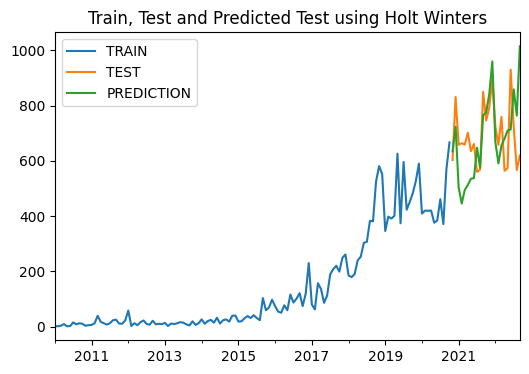

In [34]:
forecast_data = df_s

forecast_data.index.freq = 'MS'

# Split into train and test set
train_df_s = forecast_data[:130]
test_df_s = forecast_data[130:]

# What are we even waiting for, Let’s fit and forecast,

fitted_model = ExponentialSmoothing(train_df_s['count'],trend='mul',seasonal='mul').fit()
test_predictions = fitted_model.forecast(23)
train_df_s['count'].plot(legend=True,label='TRAIN')
test_df_s['count'].plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

In [33]:
print(test_predictions)

2020-11-01     634.254611
2020-12-01     723.692951
2021-01-01     503.284826
2021-02-01     445.319850
2021-03-01     494.838676
                 ...     
2029-10-01    7447.113873
2029-11-01    8074.484625
2029-12-01    9213.094403
2030-01-01    6407.151822
2030-02-01    5669.218986
Freq: MS, Length: 112, dtype: float64


Mean Absolute Error = 123.29756237056529
Mean Squared Error = 21985.507328869415


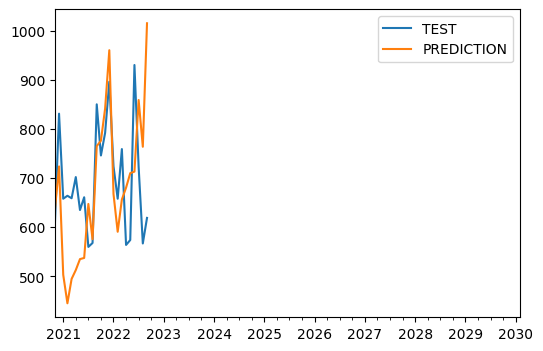

In [36]:
test_df_s['count'].plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['2020-11-01','2030-02-01'])

from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test_df_s,test_predictions)}')
print(f'Mean Squared Error = {mean_squared_error(test_df_s,test_predictions)}')

c:\Users\jsbreite\.virtualenvs\KFW_V1-n7B7ZO_c\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning:

overflow encountered in matmul



Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

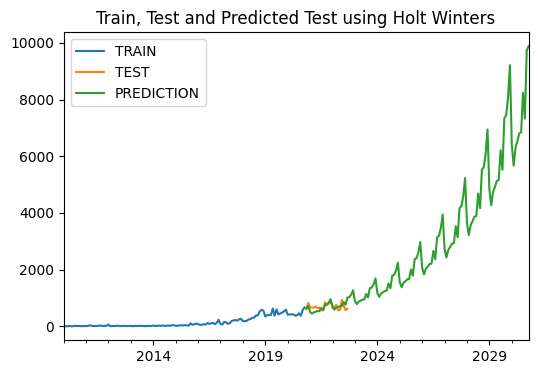

In [37]:
## Vorhersage von den nächsten 10 Jahre

forecast_data = df_s

forecast_data.index.freq = 'MS'

# Split into train and test set
train_df_s = forecast_data[:130]
test_df_s = forecast_data[130:]

# What are we even waiting for, Let’s fit and forecast,

fitted_model = ExponentialSmoothing(train_df_s['count'],trend='mul',seasonal='mul').fit()
test_predictions = fitted_model.forecast(120)
train_df_s['count'].plot(legend=True,label='TRAIN')
test_df_s['count'].plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

In [38]:
## Exportieren der Dateien in eine XLXS 

path_csv = "C:/Python/KFW_V1/Ladesaeulenregister_PRediction-Anzahl.xlsx"
test_predictions.to_excel(path_csv,
            header = True,
            index= True           
            )

***

## 4.3. Vorhersage von KW der Ladesäulen </a>

***

In [10]:
# dataframe opertations - pandas
import pandas as pd
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [7]:
# Gruppieren nach Monatlichen Daten
df_summe = df.groupby('date_month')['Anschlussleistung'].agg(['sum']) 

# Ersetzen des Index durch Zahlen
df_summe = df_summe.reset_index()

print(df_summe)


## Löschen aller Daten vor dem 1.10.2010
df_summe.drop(df_summe.index[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]], inplace=True)

## Formatieren des Date_Month Datums
df_summe['date_month'] = pd.to_datetime(df_summe['date_month'])

df_summe.set_index('date_month', inplace= True)

#mean_value = sum(df_sum(["sum"])) / len(df_sum)

# Aufgrunddessen, dass die Werte Fehlen füllen wir diese mit 0 
new_index = pd.date_range('2010-01-01', '2022-09-01', freq='MS')
df_summe = df_summe.reindex(new_index)

    date_month        sum
0   1900-03-01      22.00
1   1992-10-01      11.00
2   2001-01-01      22.00
3   2007-05-01      22.00
4   2007-12-01      11.00
..         ...        ...
163 2022-05-01   37542.00
164 2022-06-01  120101.45
165 2022-07-01   47888.10
166 2022-08-01   33169.65
167 2022-09-01   30653.30

[168 rows x 2 columns]


c:\Users\jsbreite\.virtualenvs\KFW_V1-n7B7ZO_c\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

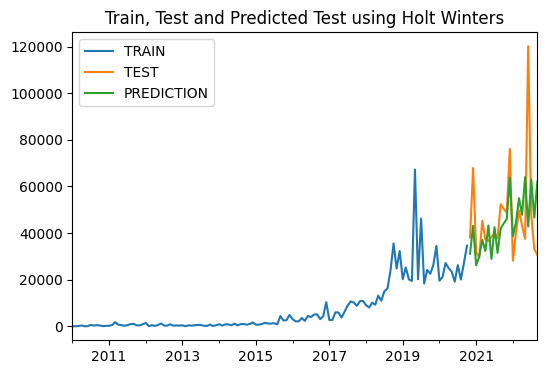

In [11]:
forecast_data_sum = df_summe

forecast_data_sum.index.freq = 'MS'

# Split into train and test set
train_df_sum = forecast_data_sum[:130]
test_df_sum = forecast_data_sum[130:]

# What are we even waiting for, Let’s fit and forecast,

fitted_model = ExponentialSmoothing(train_df_sum['sum'],trend='mul',seasonal='mul').fit()
test_predictions_sum = fitted_model.forecast(23)
train_df_sum['sum'].plot(legend=True,label='TRAIN')
test_df_sum['sum'].plot(legend=True,label='TEST',figsize=(6,4))
test_predictions_sum.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

Mean Absolute Error = 12868.328800105877
Mean Squared Error = 413720043.2515873


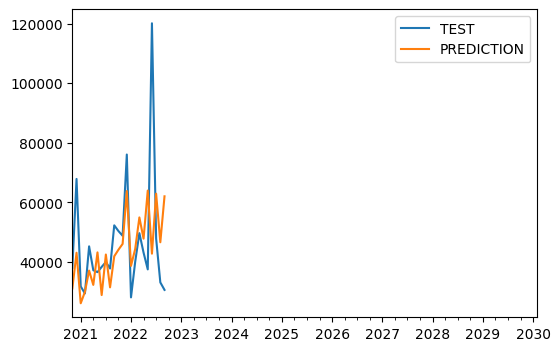

In [13]:
test_df_sum['sum'].plot(legend=True,label='TEST',figsize=(6,4))
test_predictions_sum.plot(legend=True,label='PREDICTION',xlim=['2020-11-01','2030-02-01'])

from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test_df_sum,test_predictions_sum)}')
print(f'Mean Squared Error = {mean_squared_error(test_df_sum,test_predictions_sum)}')

c:\Users\jsbreite\.virtualenvs\KFW_V1-n7B7ZO_c\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

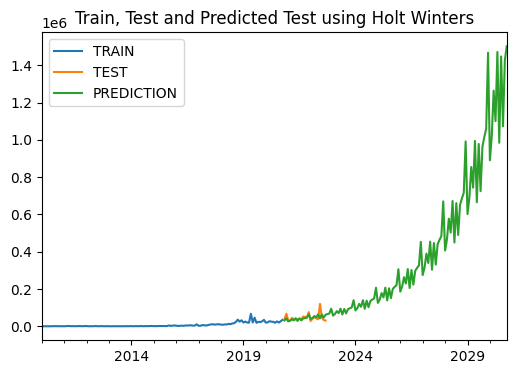

In [15]:
## Vorhersage von den nächsten 10 Jahre

forecast_data = df_summe

forecast_data.index.freq = 'MS'

# Split into train and test set
train_df_s = forecast_data[:130]
test_df_s = forecast_data[130:]

# What are we even waiting for, Let’s fit and forecast,

fitted_model = ExponentialSmoothing(train_df_s['sum'],trend='mul',seasonal='mul').fit()
test_predictions = fitted_model.forecast(120)
train_df_s['sum'].plot(legend=True,label='TRAIN')
test_df_s['sum'].plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')